# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [2]:
picture_size = 48
folder_path = "images/"

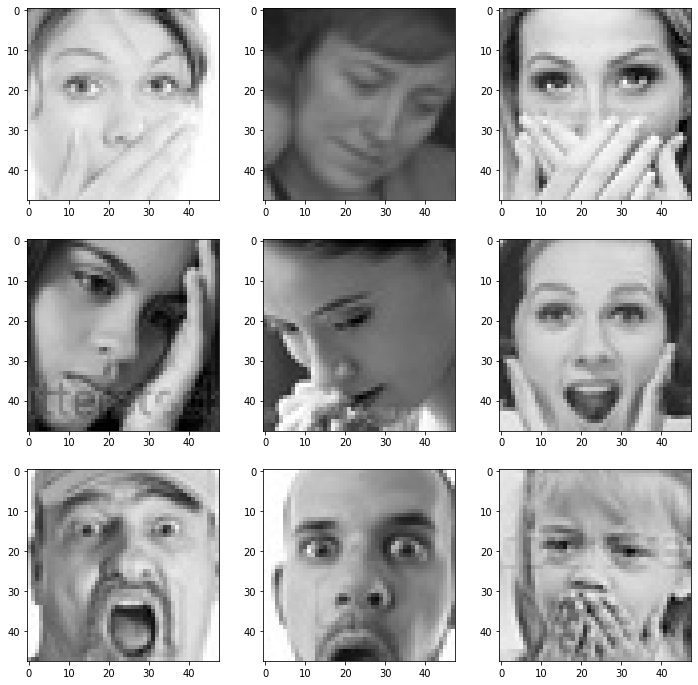

In [3]:
expression = 'Medium'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 3 classes.
Found 7066 images belonging to 3 classes.


# Model Building

In [5]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 3

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data 

In [6]:
'''from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
'''

'from keras.optimizers import RMSprop,SGD,Adam\nfrom keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau\n\ncheckpoint = ModelCheckpoint("./model.h5", monitor=\'val_acc\', verbose=1, save_best_only=True, mode=\'max\')\n\nearly_stopping = EarlyStopping(monitor=\'val_loss\',\n                          min_delta=0,\n                          patience=3,\n                          verbose=1,\n                          restore_best_weights=True\n                          )\n\nreduce_learningrate = ReduceLROnPlateau(monitor=\'val_loss\',\n                              factor=0.2,\n                              patience=3,\n                              verbose=1,\n                              min_delta=0.0001)\n\ncallbacks_list = [early_stopping,checkpoint,reduce_learningrate]\n'

In [9]:
epochs = 50

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size
                                )

model.save("model.h5")

C:\Users\HP\AppData\Local\Temp\ipykernel_25508\572359827.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/50
225/225 [==============================] - 636s 3s/step - loss: 1.0665 - accuracy: 0.4956 - val_loss: 0.9721 - val_accuracy: 0.5307
Epoch 2/50
225/225 [==============================] - 610s 3s/step - loss: 1.0043 - accuracy: 0.5364 - val_loss: 1.1165 - val_accuracy: 0.4918
Epoch 3/50
225/225 [==============================] - 604s 3s/step - loss: 0.9696 - accuracy: 0.5555 - val_loss: 1.1084 - val_accuracy: 0.4989
Epoch 4/50
225/225 [==============================] - 598s 3s/step - loss: 0.9456 - accuracy: 0.5709 - val_loss: 1.1371 - val_accuracy: 0.4977
Epoch 5/50
225/225 [==============================] - 606s 3s/step - loss: 0.9224 - accuracy: 0.5798 - val_loss: 0.9112 - val_accuracy: 0.5786
Epoch 6/50
225/225 [==============================] - 633s 3s/step - loss: 0.9013 - accuracy: 0.5860 - val_loss: 0.9598 - val_accuracy: 0.5592
Epoch 7/50
225/225 [==============================] - 748s 3s/step - loss: 0.8752 - accuracy: 0.6021 - val_loss: 0.8814 - val_accuracy: 0.5834

# Plotting Accuracy & Loss

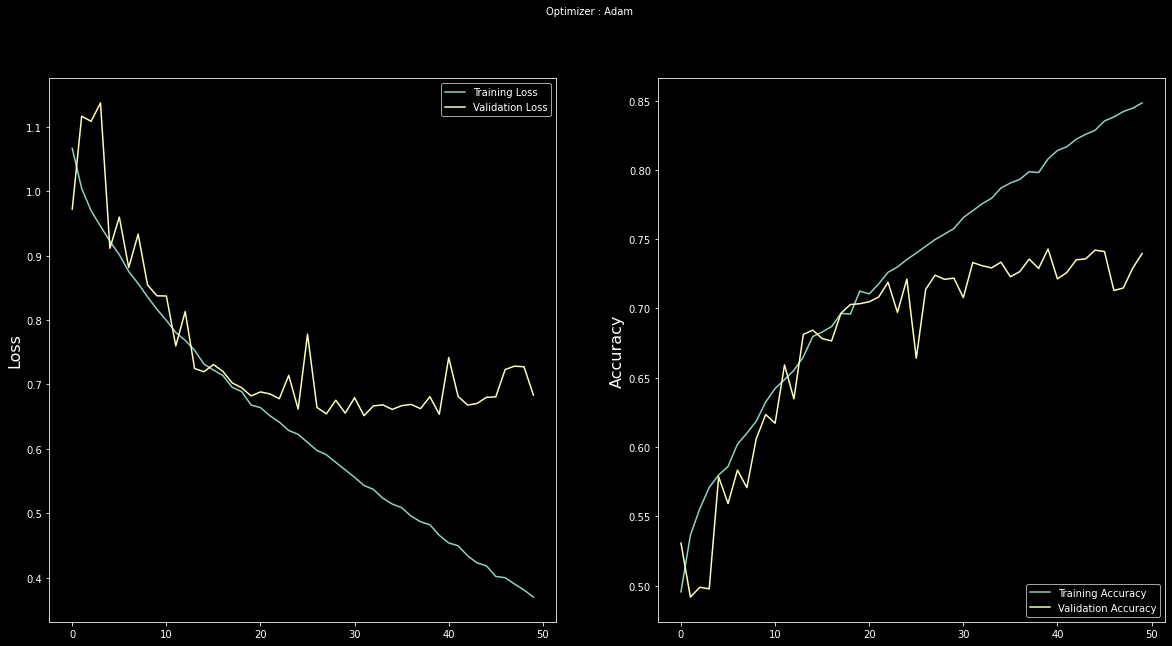

In [10]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()